<a href="https://colab.research.google.com/github/armic243/LGMVIP-DataScience/blob/master/LGM_task_4_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LetsGrowMore Virtual Internship Program**
# Task 4: Neural Network that can read handwriting
# Aryan Michael


In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow import keras 
import pandas as pd
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [2]:
mnist= tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


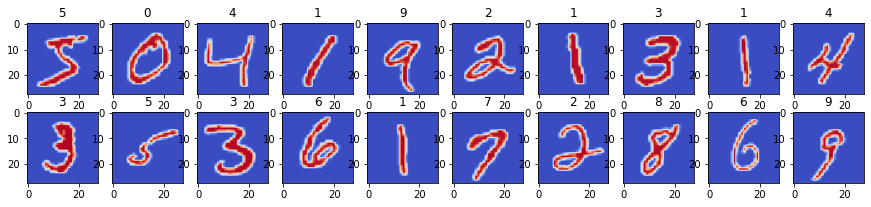

In [4]:
fig=plt.figure(figsize=(15,3))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1)
  ax.imshow(np.squeeze(x_train[i]), cmap='coolwarm')
  ax.set_title(y_train[i])

In [5]:
xtrain = x_train/255.0
xtest = x_test/255.0

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation ='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1  = model.fit(xtrain, y_train, epochs = 5, verbose = 1, validation_data = (xtest, y_test))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2551 - accuracy: 0.9276 - val_loss: 0.1407 - val_accuracy: 0.9564
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1124 - accuracy: 0.9669 - val_loss: 0.0941 - val_accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0758 - accuracy: 0.9770 - val_loss: 0.0799 - val_accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0562 - accuracy: 0.9830 - val_loss: 0.0789 - val_accuracy: 0.9756
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0441 - accuracy: 0.9861 - val_loss: 0.0722 - val_accuracy: 0.9777


In [8]:
score = model.evaluate(xtest, y_test, verbose = 0 )
print("Accuracy: ", score[1])

Accuracy:  0.9776999950408936


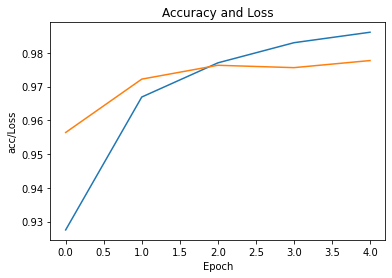

In [9]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history1.history['accuracy'],label='acc')
plt.plot(history1.history["val_accuracy"],label='val')
plt.show()

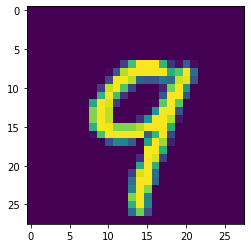

In [12]:
plt.imshow(np.squeeze(x_test[12]))

In [13]:
prediction=model.predict(x_test)
print(np.argmax(prediction[12]))

9
